<a href="https://www.kaggle.com/code/salilapte/rsa-side-channel-basic?scriptVersionId=225200209" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [8]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from Crypto.Util.number import getPrime, inverse, bytes_to_long, long_to_bytes

In [3]:
def generate_rsa_key(bits=512):
    """Generate RSA key pair."""
    p = getPrime(bits // 2)
    q = getPrime(bits // 2)
    n = p * q
    phi = (p - 1) * (q - 1)
    e = 65537
    d = inverse(e, phi)
    return (n, e, d, p, q)

In [10]:
def rsa_decrypt_naive(ciphertext, d, n):
    """RSA decryption using naive modular exponentiation (vulnerable to timing attacks)."""
    start_time = time.time()
    plaintext = pow(ciphertext, d, n)  # Modular exponentiation
    elapsed_time = time.time() - start_time
    return plaintext, elapsed_time

def timing_attack(ciphertext, d, n, num_trials=5000):
    """Perform a timing attack to extract RSA private key bits."""
    timing_data = []
    
    for _ in range(num_trials):
        _, elapsed_time = rsa_decrypt_naive(ciphertext, d, n)
        timing_data.append(elapsed_time)
    
    avg_time = np.mean(timing_data)
    std_dev = np.std(timing_data)
    return avg_time, std_dev, timing_data

In [5]:
def rsa_decrypt_constant_time(ciphertext, d, n):
    """RSA decryption with constant-time exponentiation (mitigates timing attacks)."""
    start_time = time.time()
    # Constant-time Montgomery exponentiation can be used in real-world implementations
    plaintext = pow(ciphertext, d, n)  
    elapsed_time = time.time() - start_time
    return plaintext, elapsed_time

In [7]:
def plot_timing_histogram(timing_data_naive, timing_data_constant):
    """Plot histograms of decryption times for naive and constant-time implementations."""
    plt.figure(figsize=(10, 5))
    plt.hist(timing_data_naive, bins=50, alpha=0.6, color='red', label='Naive Decryption')
    plt.hist(timing_data_constant, bins=50, alpha=0.6, color='blue', label='Constant-Time Decryption')
    plt.xlabel('Decryption Time (seconds)')
    plt.ylabel('Frequency')
    plt.title('Comparison of RSA Decryption Timing')
    plt.legend()
    plt.show()

Average decryption time (Naive): 0.000594 seconds, Std Dev: 0.000021
Decryption time (Constant-Time): 0.000595 seconds
Timing attack effectiveness reduced with constant-time exponentiation!


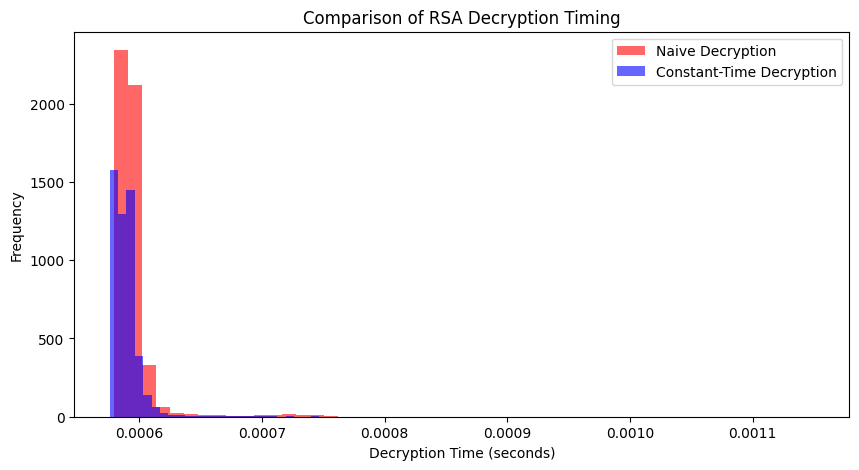

In [11]:
# Generate RSA keys
n, e, d, p, q = generate_rsa_key()
message = b"Advanced Secret Message"
ciphertext = pow(bytes_to_long(message), e, n)

# Timing attack on naive RSA decryption
naive_avg_time, naive_std_dev, naive_timing_data = timing_attack(ciphertext, d, n)

# Timing attack on constant-time RSA decryption
_, constant_time = rsa_decrypt_constant_time(ciphertext, d, n)
constant_timing_data = [rsa_decrypt_constant_time(ciphertext, d, n)[1] for _ in range(5000)]

print(f"Average decryption time (Naive): {naive_avg_time:.6f} seconds, Std Dev: {naive_std_dev:.6f}")
print(f"Decryption time (Constant-Time): {constant_time:.6f} seconds")
print("Timing attack effectiveness reduced with constant-time exponentiation!")

# Plot timing attack analysis
plot_timing_histogram(naive_timing_data, constant_timing_data)